In [31]:
import torch
import collections
import matplotlib.pyplot as plt


from model import Model
from torchvision.datasets import Cityscapes
from argparse import ArgumentParser
from torch import nn
from torchvision.transforms import v2

from helpers import *

In [32]:
resizing_factor = 16
batch_size = 5
data_path = './Datasets/CityScapes'
# data loading
transforms = v2.Compose([v2.Resize((1024//resizing_factor,2048//resizing_factor)),v2.ToImage(),v2.ToDtype(torch.float32,scale = True),v2.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
target_transforms = v2.Compose([v2.Resize((1024//resizing_factor,2048//resizing_factor)),v2.ToImage(),v2.ToDtype(torch.float32,scale = True)])
dataset = Cityscapes(data_path, split='train', mode='fine', target_type='semantic',transform = transforms,target_transform=target_transforms)

# train_data = dataset[:int(len(dataset)*0.9)]
# val_data = dataset[int(len(dataset)*0.9):]
train_set,val_set = torch.utils.data.random_split(dataset,[0.01,0.99] ,generator=torch.Generator().manual_seed(1))
trainloader = torch.utils.data.DataLoader(train_set,batch_size = batch_size,shuffle = True)

In [45]:
model = torch.load('fifth_model.pt')

sample = dataset[0]
img, target = sample

output_viz = model.forward(img.view(1,-1,1024//resizing_factor,2048//resizing_factor).cuda())


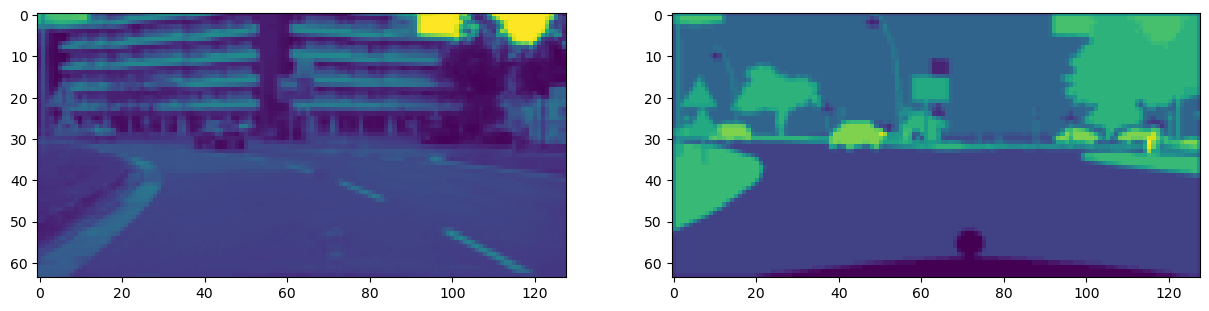

In [46]:
fig, ax = plt.subplots(1,2,figsize = (15,5))
ax[0].imshow(img[0,:,:])
ax[1].imshow(target[0,:,:])

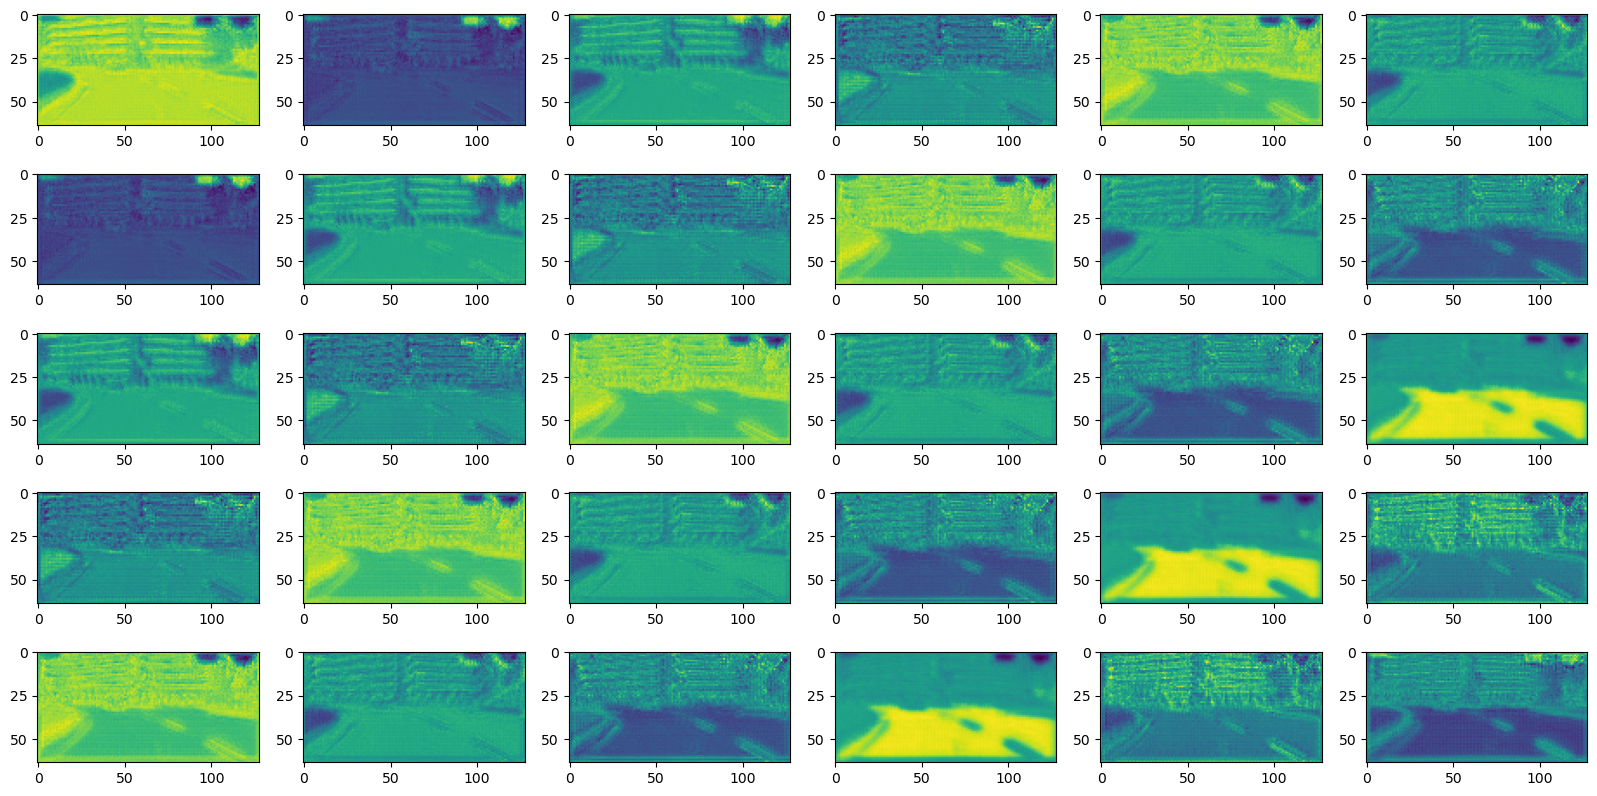

In [41]:
torch.Tensor.size(output_viz)
output_viz_cpu = output_viz.cpu()
output_viz_cpu = output_viz_cpu.detach().numpy()
fig, ax = plt.subplots(5,6,figsize = (20,10))
for i in range(5):
    for ii in range(6):
        ax[i,ii].imshow(output_viz_cpu[0,i+ii,:,:])

In [47]:
np.size(output_viz_cpu,2)
array = np.zeros((np.size(output_viz_cpu,2),np.size(output_viz_cpu,3)))
for x in range(np.size(output_viz_cpu,2)):
    for y in range(np.size(output_viz_cpu,3)):
        value =  max(output_viz_cpu[0,:,x,y])
        index = np.argmax(output_viz_cpu[0,:,x,y])
        array[x,y] = index

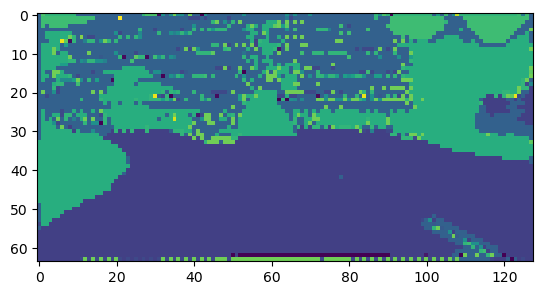

In [48]:
plt.imshow(array)


In [49]:
maxim =  max(output_viz_cpu[0,:,1,1])
index = np.argmax(output_viz_cpu[0,:,x,y])
output_viz_cpu[0,:,x,y]
index

7

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


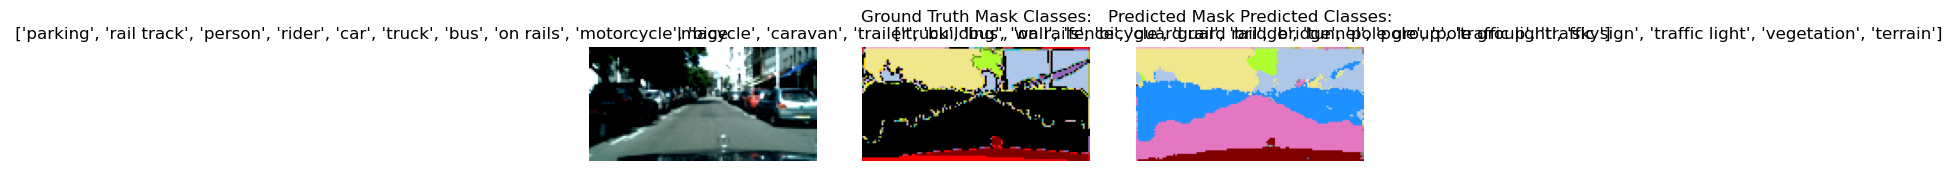

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


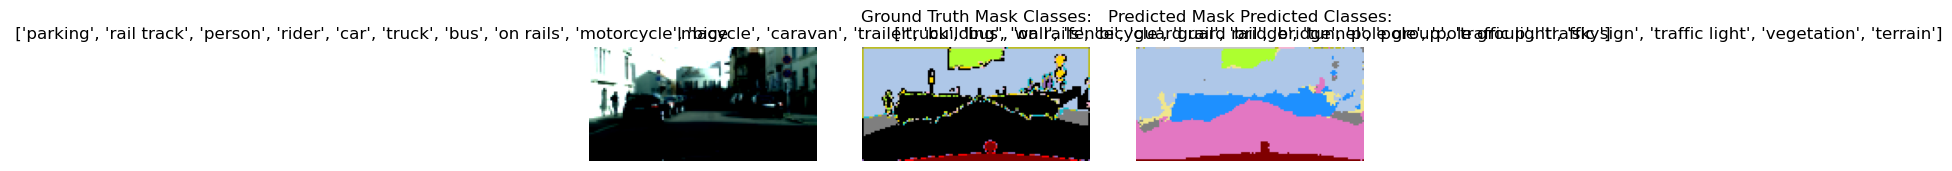

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


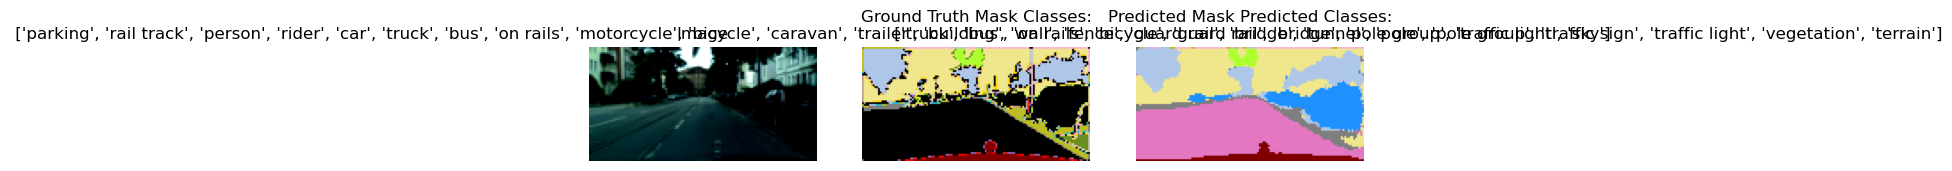

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


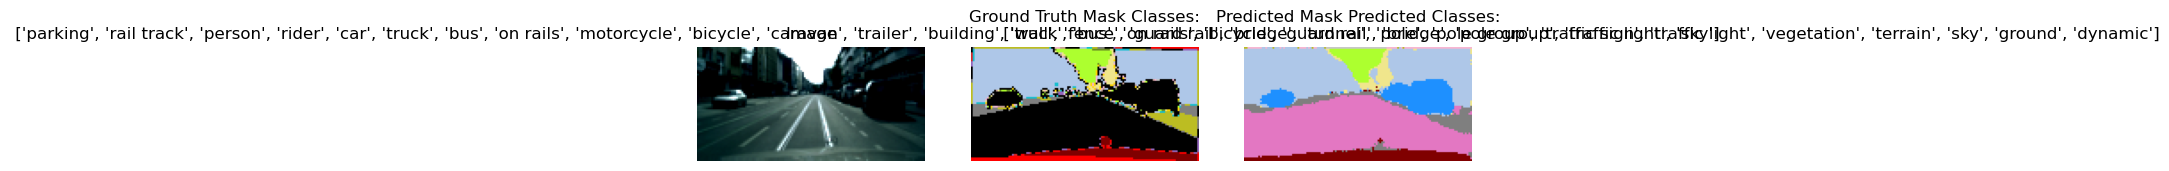

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


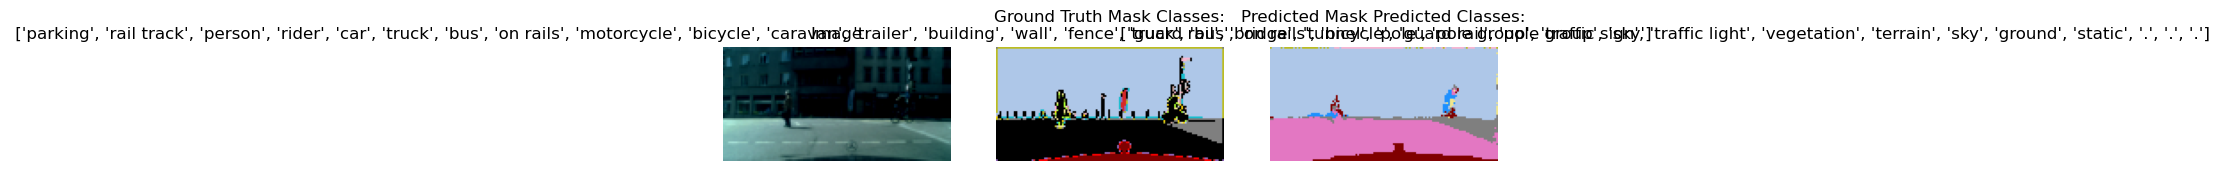

In [50]:
visualize_segmentation(model,trainloader,num_examples=1)
# torch.save(model,'second_model.pt')